# First Deep Learning Project in Python with Keras

The steps we are going to cover:
1. Dependancies installation
2. Load Data.
3. Define Keras Model.
4. Compile Keras Model.
5. Fit Keras Model.
6. Evaluate Keras Model.
7. Put It All Together.
8. Make Predictions

## Dependancies installation

In [1]:
# try:
#     import google.colab
#     IN_COLAB = True
# except ImportError:
#     IN_COLAB = False

# if IN_COLAB:
#     # Installer toutes les librairies nécessaires
#     !pip install tensorflow numpy pandas scikit-learn matplotlib seaborn
# else:
#     print("""In the environment you created for this module, install the required dependencies.
# For example:
#     conda create --name ML5 python=3.11
#     conda activate ML5
#     conda install jupyter tensorflow numpy pandas scikit-learn matplotlib seaborn""")


## Load Data
    

In [2]:
# if IN_COLAB:
#   from google.colab import files
#   uploaded = files.upload()

Download the dataset and place it in your local working directory, the same location as your python file. Take a look at the dataset:

In [3]:
import pandas as pd
df = pd.read_csv('../data/housepricedata.csv')

Here, you can explore the data a little. We have our input features in the first ten columns:

- Lot Area (in sq ft)
- Overall Quality (scale from 1 to 10)
- Overall Condition (scale from 1 to 10)
- Total Basement Area (in sq ft)
- Number of Full Bathrooms
- Number of Half Bathrooms
- Number of Bedrooms above ground
- Total Number of Rooms above ground
- Number of Fireplaces
- Garage Area (in sq ft)

In our last column, we have the feature that we would like to predict:
- Is the house price above the median or not? (1 for yes and 0 for no)

Which task are we going to train the neural network for (regression, classification, other...) ?

In [4]:
# Your answer here : 
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


Now that we’ve seen what our data looks like, we want to convert it into arrays for our machine to process:

Au vue des données, AboveMedianPrice est une catégrorie de valeur 0 et 1
Les autres varibles sont tous numériques également.
je partirai sur un Support vector Machine clssifier => classer entre 0 et 1


In [5]:
dataset = df.values

Split the dataset into input features (X) and the feature we wish to predict (Y). To do that split, assign the first 10 columns of our array to a variable called X and the last column of our array to a variable called Y

In [6]:
X = dataset[:,0:10]
y = dataset[:,10]

Now, we want to split our dataset into a training set, a validation set and a test set. These are the dimensions you need to get for your train, validation and test datasets: (1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)

We will use the code from scikit-learn called ‘train_test_split’, which as the name suggests, split our dataset into a training set and a test set. We first import the code we need:

In [7]:
# splitting into train and test
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Split with a 30% test set, we stratify so that we have the same rate of positives
#in the training and test sets (as well as the same sex ratio, it will be useful at the end of the notebook)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42, 
                                                    test_size = 219)


Unfortunately, this function only helps us split our dataset into two. Since we want a separate validation set and test set, we can use the same function to do the split again on val_and_test:

In [8]:
# splitting into validation and test
X_train,X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 42, 
                                                    test_size = 219)


In [9]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape 

((1022, 10), (219, 10), (219, 10), (1022,), (219,), (219,))

Feature scaling will help us see all the variables from the same scale, it will also help our models learn faster

In [10]:
# scaling

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = X_test.copy()
X_test_scaled = scaler.transform(X_test)
X_val_scaled = X_val.copy()
X_val_scaled = scaler.transform(X_val)

## Define Keras Model.

The first thing we have to do is to set up the architecture. Let’s first think about what kind of neural network architecture we want. Suppose we want this neural network:
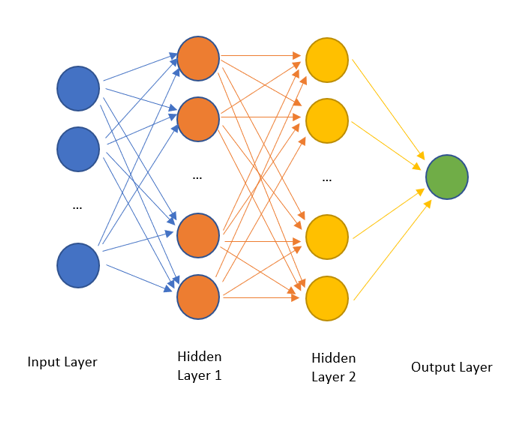  
In words, we want to have these layers:

- Hidden layer 1: 12 neurons, ReLU activation
- Hidden layer 2: 16 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation
    
Now, we need to describe this architecture to Keras. We will be using the Sequential model, which means that we merely need to describe the layers above in sequence.

In [79]:
# Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense

model= Sequential([
    Dense(units=12,activation='relu'), # First hidden layer
    Dense(units=16,activation='relu'), # second hidden layer
    Dense(1,activation='sigmoid')   # Output mayer with 1 class
    ])
model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Now that the model is defined, we can compile it.

Compiling the model uses TensorFlow that chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

In [80]:
# compile model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

We have defined our model and compiled it ready for efficient computation.

Now it is time to execute the model on some data (use 100 iterations and 32 batch size).

In [ ]:

# from sklearn.neighbors import KNeighborsClassifier
# n_neighbors = 15

# #TOFILL: 
# knn = KNeighborsClassifier(n_neighbors=n_neighbors)
# knn.fit(X_train_scaled, y_train)

# y_test_pred = knn.predict(X_test_scaled)

In [55]:
# train model
model.fit(X_train_scaled, y_train,
          epochs=100, batch_size=32)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9110 - loss: 0.0645 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9110 - loss: 0.0644 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9119 - loss: 0.0644 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9110 - loss: 0.0644 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9119 - loss: 0.0644 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9110 - loss: 0.0643 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9119 - loss: 0.0643 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9110 - loss: 0.0643 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9119 - loss: 0.0643 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9119 - loss: 0.0643 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9119 - loss: 0.0642 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

In [56]:
# Évaluation rapide
loss, acc = model.evaluate(X_train_scaled, y_train, verbose=0)
print(f"Final — loss: {loss:.4f}, accuracy: {acc:.5f}")

Final — loss: 0.0626, accuracy: 0.91292


In [57]:
# predict on validation set
y_pred_train=model.predict(X_train_scaled)
y_pred_val=model.predict(X_val)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [58]:
# calculate accuracy on validation set
from sklearn.metrics import accuracy_score

#TOFILL
accu_score=accuracy_score(y_val, y_pred_val)
print(f"The accuracy of the validation set is:{accu_score:.5f}")

The accuracy of the validation set is:0.50685


We have trained our model, which gives us a correct accuracy. But we haven't used our validation set properly, and our test set at all. Let's correct that.

In [81]:
# train model
model.fit(X_train_scaled, y_train, 
          epochs=100, batch_size=32,
                    validation_data=(X_val_scaled, y_val))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5078 - loss: 0.2806 - val_accuracy: 0.5068 - val_loss: 0.2590
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5068 - loss: 0.2611 - val_accuracy: 0.5068 - val_loss: 0.2421
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5225 - loss: 0.2442 - val_accuracy: 0.5753 - val_loss: 0.2273
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5890 - loss: 0.2294 - val_accuracy: 0.6393 - val_loss: 0.2142
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6595 - loss: 0.2165 - val_accuracy: 0.7032 - val_loss: 0.2027
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7202 - loss: 0.2052 - val_accuracy: 0.7626 - val_loss: 0.1924
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7495 - loss: 0.1949 - val_accuracy: 0.7808 - val_loss: 0.1832
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7710 - loss: 0.1855 - val_accuracy: 0.8082 - v

In [82]:
# predict on TEST set
y_pred_test=model.predict(X_test_scaled)

# calculate accuracy on test set
loss_test, acc_test = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"[Keras] Test — loss: {loss_test:.5f}, accuracy: {acc_test:.5f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[Keras] Test — loss: 0.06501, accuracy: 0.91324


Visualize training and validation losses and accuracies plots with the help of keras

In [62]:
# visualize training and validation accuracies
import matplotlib.pyplot as plt


In [77]:
model.history.history['loss']

[0.06267393380403519,
 0.06263826787471771,
 0.06263473629951477,
 0.06261421740055084,
 0.06259879469871521,
 0.06257356703281403,
 0.06256359070539474,
 0.06253981590270996,
 0.06253822892904282,
 0.06251905858516693,
 0.06250987201929092,
 0.062493789941072464,
 0.06246096268296242,
 0.0624500997364521,
 0.06244123727083206,
 0.06242655590176582,
 0.0624239556491375,
 0.06239471957087517,
 0.062374815344810486,
 0.062359441071748734,
 0.06234271451830864,
 0.06233526021242142,
 0.06232234835624695,
 0.06232089921832085,
 0.062296416610479355,
 0.06227783486247063,
 0.062272753566503525,
 0.062238890677690506,
 0.06222778931260109,
 0.06222181022167206,
 0.062199126929044724,
 0.06219330057501793,
 0.06217608600854874,
 0.062168437987565994,
 0.06215167045593262,
 0.06212923675775528,
 0.06212083250284195,
 0.06210177764296532,
 0.06209172308444977,
 0.06207737326622009,
 0.06205165386199951,
 0.06205529719591141,
 0.06204279139637947,
 0.06201094761490822,
 0.06199974939227104,
 0.0

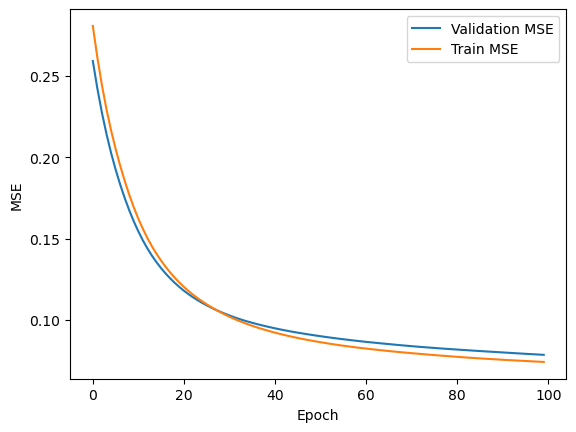

In [84]:
# visualize training and validation losses
history = model.history.history  # ou celui sauvegardé dans la boucle
plt.plot(history["val_loss"], label="Validation MSE")
plt.plot(history["loss"], label="Train MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset. A list of most hyperparameters available keras: 

https://keras.io/api/layers/initializers/

https://keras.io/api/layers/activations/

https://keras.io/api/losses/

https://keras.io/api/optimizers/